# Regressão Linear Múltipla
---

<img src="https://selecao-stg.letscode.com.br/favicon.png" style="position: absolute; top: 0.75rem; right: 2rem; width: 50px" />

### Roteiro da Aula

1. Análise Exploratória dos Dados
2. Criação do Modelo de Regressão Linear Múltipla  
    2.1. Sklearn  
    2.2. StatsModels  
3. Remoção de Outliers
4. Considerando dados categóricos
3. Retirando Variáveis
4. Transformação de Variáveis
5. Na prática: Divisão Treino/Teste
6. Exercício

#### Regressão Linear Simples

$$
y = \beta_0 + \beta_1 \cdot x
$$

#### Regressão Linear Múltipla

$$
    y_i = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 + \dots + \beta_n x_n
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

sns.set() # Definir o tema do Matplotlib como sendo o tema padrão do Seaborn

In [72]:
# importando o dataset
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/6e4f0eea-5f67-4e91-ae19-8343df190003.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [6]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [7]:
df.shape

(159, 7)

## Análise Exploratória dos Dados

> Como os dados se relacionam?

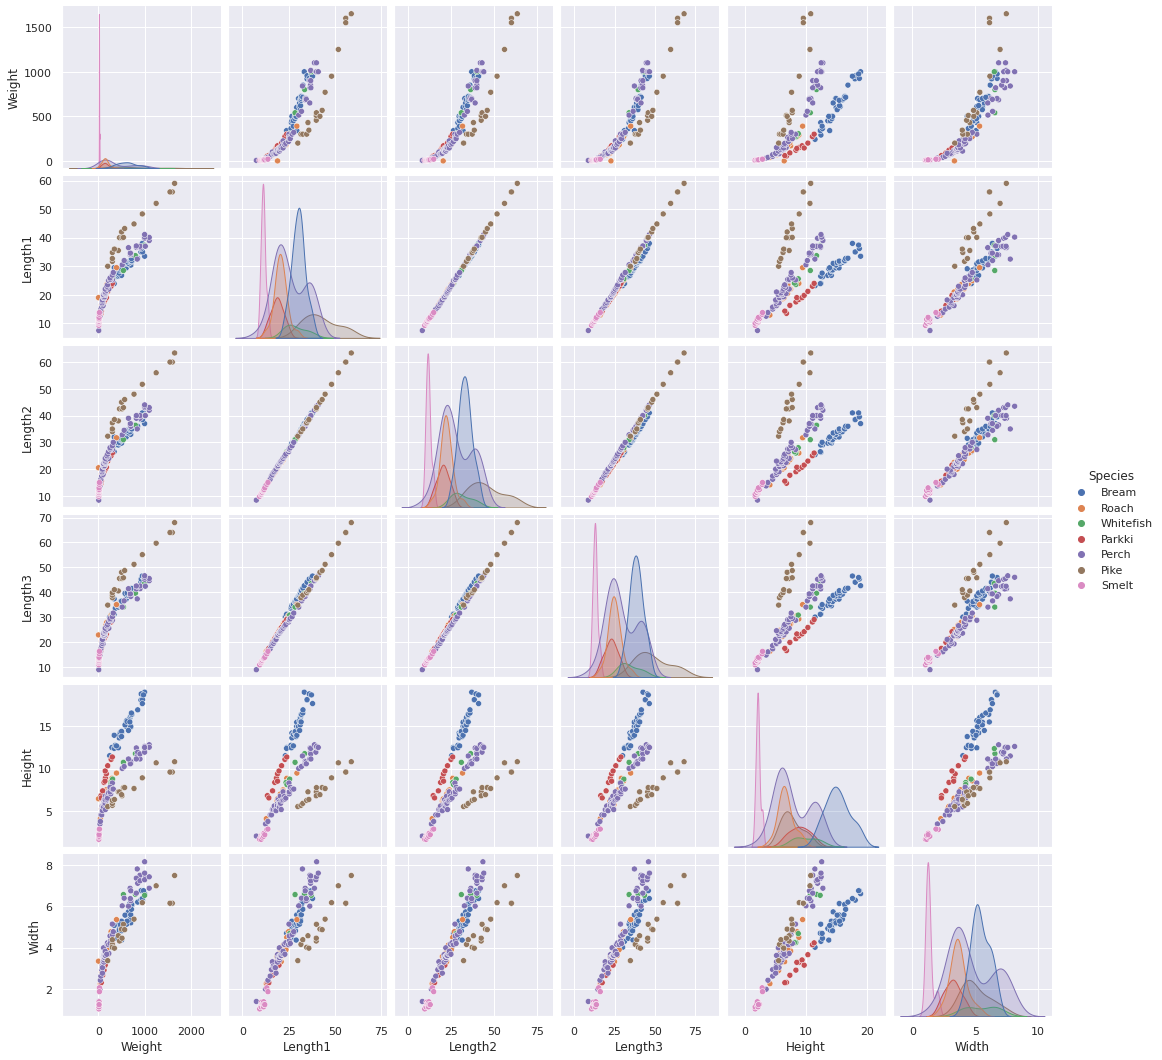

In [8]:
# Dispersão
sns.pairplot(df, hue='Species')

In [9]:
# Correlação
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot:>

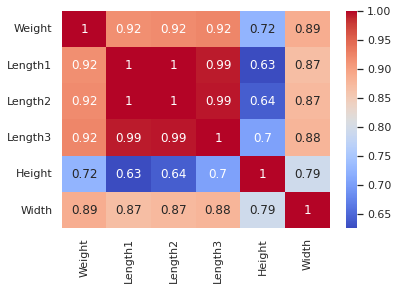

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## Definir a Regressão Linear Múltipla

In [11]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [96]:
# Variáveis explicaticas e variável resposta
y = df['Weight']
X = df.drop(['Species', 'Weight'], axis=1)

In [97]:
y # peso

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [98]:
X.head() # variáveis explicativas

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


### Scikit Learn

#### Etapas de utilização de um modelo de ML

1. Preparar o X (variáveis explicativas) e o y (variável resposta)
2. Fitar o modelo (treinar): calcular os coefientes da Regressão Linear.
3. Predizer outros valores de X, utilizando o modelo treinado.

In [99]:
lr = LinearRegression()

lr.fit(X, y)

y_pred = lr.predict(X)

lr.score(X, y) # R²

0.8852867046546207

In [103]:
y.values[:5]

array([242., 290., 340., 363., 430.])

In [101]:
y_pred[:5]

array([326.81612777, 369.57859339, 370.82418025, 439.05613854,
       444.16916821])

### Statsmodels

In [16]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

/home/walisson/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     236.2
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           4.95e-70
Time:                        10:17:07   Log-Likelihood:                -987.96
No. Observations:                 159   AIC:                             1988.
Df Residuals:                     153   BIC:                             2006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -499.5870     29.572    -16.894      0.000    -558.010    -441.164
Length1       62.3552     40.209      1.551      0.123     -17.081     141.791
Length2       -6.5268     41.759     -0.156      0.876     -89.025      75.971
Length3      -29.0262     17.353     -1.673      0.096     -63.309       5.256
Height        28.2974      8.729      3.242      0.001      11.052      45.543
Width         22.4733     20.372      1.103      0.272     -17.773      62.720
==============================================================================
Omnibus:                       20.989   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.307
Skew:                           0.792   Prob(JB):                     1.18e-06
Kurtosis:                       4.269   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Pesquise sobre Redução de Dimensionalidade

1. PCA e LDA

### Análise do Erro da Regressão

In [17]:
# residuos = y - y_pred
model.resid

0      -84.816128
1      -79.578593
2      -30.824180
3      -76.056139
4      -14.169168
          ...    
154    172.808116
155    158.935439
156    150.043413
157    102.979758
158    101.905694
Length: 159, dtype: float64

#### 1. A média do erro deve ser zero

In [18]:
model.resid.mean()

2.3909986499439244e-12

#### 2. A distribuição dos erros deve seguir uma distribuição normal

<AxesSubplot:ylabel='Count'>

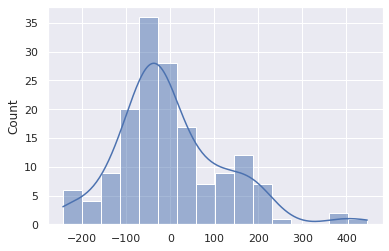

In [19]:
sns.histplot(x=model.resid, kde=True)

#### 3. Erro deve ser descorrelacionado

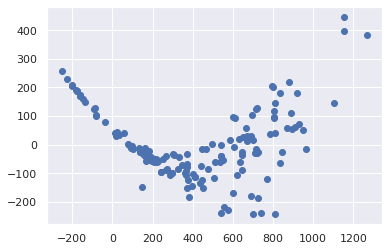

In [20]:
plt.scatter(y_pred, model.resid)

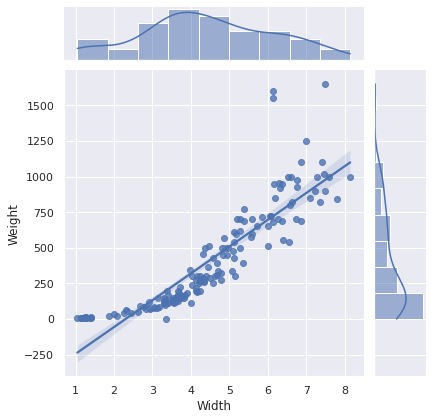

In [21]:
sns.jointplot(data=df, x='Width', y='Weight', kind='reg')

### Removendo outliers e considerando dados categóricos

In [22]:
df['Weight']

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [23]:
df[['Weight']]

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0
...,...
154,12.2
155,13.4
156,12.2
157,19.7


<AxesSubplot:>

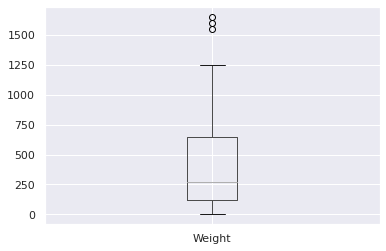

In [24]:
df[['Weight']].boxplot()

<AxesSubplot:title={'center':'Boxplots'}>

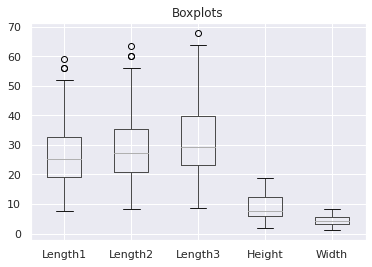

In [25]:
plt.title('Boxplots')
df.drop('Weight', axis=1).boxplot()

<AxesSubplot:xlabel='Length1'>

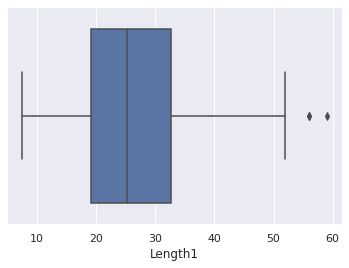

In [26]:
sns.boxplot(data=df, x='Length1')

In [27]:
def calc_min_and_max_range(dados_coluna):
    Q1 = dados_coluna.quantile(q=0.25) # Primeiro quartil
    Q3 = dados_coluna.quantile(q=0.75) # Terceiro quartil

    IQR = Q3 - Q1 # Intervalo interquartílico

    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR

    return inf, sup

In [28]:
lista_colunas = ['Weight', 'Length1', 'Length2', 'Length3']

In [29]:
for coluna in lista_colunas:
    inf, sup = calc_min_and_max_range(df[coluna])
    
    df = df[(df[coluna] >= inf) & (df[coluna] <= sup)]

In [30]:
df.shape

(155, 7)

<AxesSubplot:>

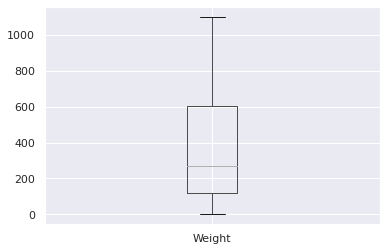

In [31]:
df[['Weight']].boxplot()

<AxesSubplot:title={'center':'Boxplots'}>

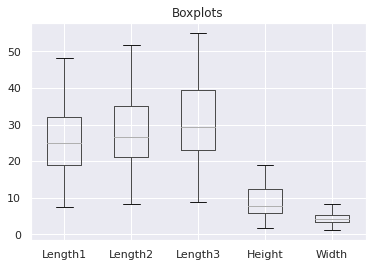

In [32]:
plt.title('Boxplots')
df.drop('Weight', axis=1).boxplot()

#### Regressão Linear sem outliers e com dados categóricos

In [33]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [34]:
df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [35]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [36]:
df_dummies.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


### Definir as variáveis explicativas e a variável resposta

In [ ]:
y = df_dummies['Weight']

In [ ]:
X = df_dummies.drop('Weight', axis=1)

In [ ]:
X.head()

,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


### Modelo de Regressão Linear Múltipla sem outliers e com os dados categóricos

In [ ]:
lr = LinearRegression()

lr.fit(X, y)

y_pred = lr.predict(X)

lr.score(X, y) # R²

0.9472987222606407

In [41]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

/home/walisson/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     233.7
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           1.60e-85
Time:                        10:17:11   Log-Likelihood:                -881.85
No. Observations:                 155   AIC:                             1788.
Df Residuals:                     143   BIC:                             1824.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -734.9518    102.906     -7.142      0.000    -938.366    -531.537
Length1              11.0975     30.730      0.361      0.719     -49.647      71.842
Length2              22.2989     37.115      0.601      0.549     -51.065      95.663
Length3             -19.7388     24.100     -0.819      0.414     -67.377      27.899
Height               50.0529     11.479      4.360      0.000      27.362      72.744
Width                50.7188     19.915      2.547      0.012      11.352      90.085
Species_Parkki       66.1808     61.153      1.082      0.281     -54.699     187.061
Species_Perch       159.1071     95.642      1.664      0.098     -29.948     348.163
Species_Pike        155.8195    114.178      1.365      0.174     -69.875     381.514
Species_Roach       133.4484     72.566      1.839      0.068      -9.993     276.890
Species_Smelt       434.1257     94.892      4.575      0.000     246.553     621.698
Species_Whitefish   145.9115     77.013      1.895      0.060      -6.319     298.142
==============================================================================
Omnibus:                       31.844   Durbin-Watson:                   0.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.782
Skew:                           1.005   Prob(JB):                     2.10e-12
Kurtosis:                       5.070   Cond. No.                     1.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
model.resid

0     -35.237020
1     -55.033551
2     -25.047739
3     -42.481527
4      12.070844
         ...    
154     2.546107
155   -11.637709
156   -16.406819
157   -93.443043
158   -89.209976
Length: 155, dtype: float64

<AxesSubplot:ylabel='Count'>

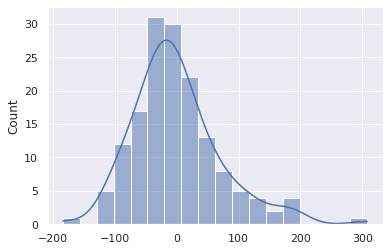

In [43]:
sns.histplot(model.resid, kde=True)

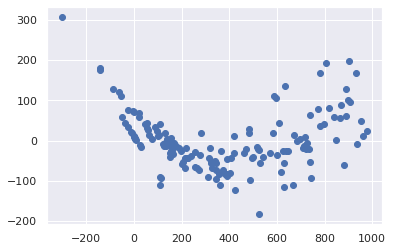

In [44]:
plt.scatter(y_pred, model.resid)

### Removendo variáveis altamente correlacionadas

In [45]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [46]:
y = df_dummies['Weight']

In [47]:
X = df_dummies.drop(['Weight', 'Length2', 'Length3'], axis=1)

In [48]:
X.head()

,Length1,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,11.5200,4.0200,0,0,0,0,0,0
1,24.0,12.4800,4.3056,0,0,0,0,0,0
2,23.9,12.3778,4.6961,0,0,0,0,0,0
3,26.3,12.7300,4.4555,0,0,0,0,0,0
4,26.5,12.4440,5.1340,0,0,0,0,0,0


### Modelo de Regressão Linear Múltipla sem outliers e com os dados categóricos

In [49]:
lr = LinearRegression()

lr.fit(X, y)

y_pred = lr.predict(X)

lr.score(X, y) # R²

0.9470435482199099

In [50]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

/home/walisson/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     288.1
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           7.84e-88
Time:                        11:28:30   Log-Likelihood:                -882.22
No. Observations:                 155   AIC:                             1784.
Df Residuals:                     145   BIC:                             1815.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -795.1298     66.465    -11.963      0.000    -926.496    -663.764
Length1              13.6160      3.868      3.520      0.001       5.971      21.261
Height               48.7400     10.737      4.540      0.000      27.519      69.961
Width                47.9555     19.473      2.463      0.015       9.467      86.444
Species_Parkki      103.6754     37.725      2.748      0.007      29.113     178.238
Species_Perch       216.1790     66.159      3.268      0.001      85.418     346.940
Species_Pike        187.4909    106.233      1.765      0.080     -22.475     397.457
Species_Roach       164.3579     61.481      2.673      0.008      42.844     285.872
Species_Smelt       481.0809     73.236      6.569      0.000     336.332     625.830
Species_Whitefish   182.8002     62.681      2.916      0.004      58.914     306.687
==============================================================================
Omnibus:                       33.050   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.726
Skew:                           1.034   Prob(JB):                     4.81e-13
Kurtosis:                       5.123   Cond. No.                         840.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### [Bônus] Transformação log & Transformação log-log (duplo)

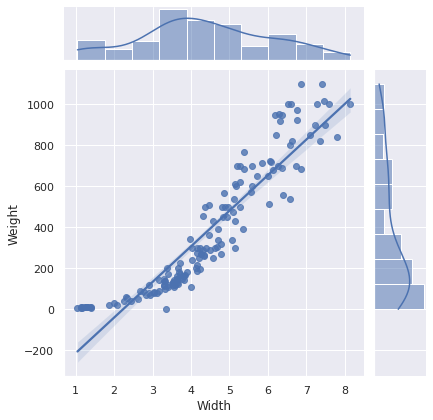

In [51]:
sns.jointplot(data=df, x='Width', y='Weight', kind='reg')

In [78]:
df_dummies = df_dummies[df_dummies['Weight'] != 0]

In [56]:
np.log(df['Weight'])

0      5.488938
1      5.669881
2      5.828946
3      5.894403
4      6.063785
         ...   
154    2.501436
155    2.595255
156    2.501436
157    2.980619
158    2.990720
Name: Weight, Length: 154, dtype: float64

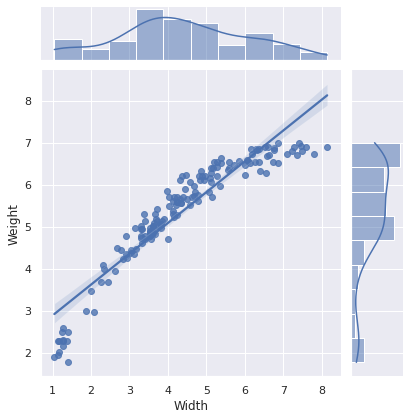

In [59]:
sns.jointplot(x=df['Width'], y=np.log(df['Weight']), kind='reg')

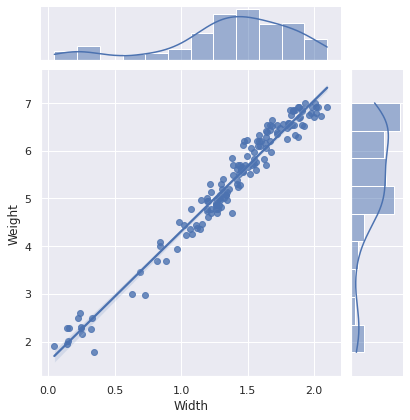

In [60]:
sns.jointplot(x=np.log(df['Width']), y=np.log(df['Weight']), kind='reg')

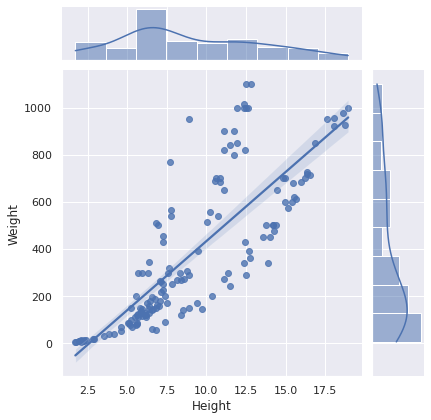

In [63]:
# Para a altura (antes)
sns.jointplot(x=df['Height'], y=df['Weight'], kind='reg')

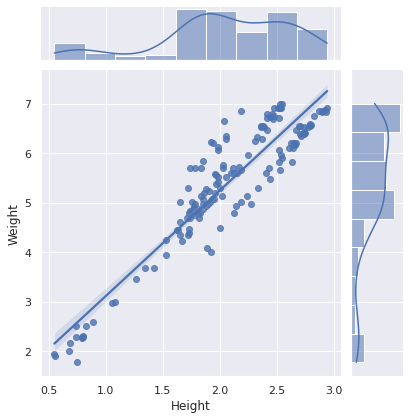

In [62]:
# Para a altura (depois)
sns.jointplot(x=np.log(df['Height']), y=np.log(df['Weight']), kind='reg')

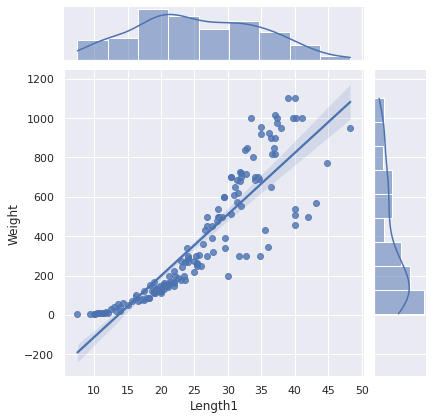

In [65]:
# Para o comprimento (antes)
sns.jointplot(x=df['Length1'], y=df['Weight'], kind='reg')

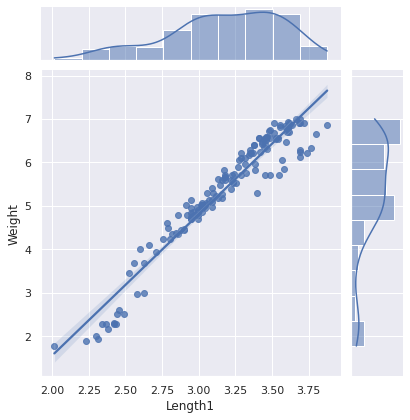

In [64]:
# Para o comprimento (depois)
sns.jointplot(x=np.log(df['Length1']), y=np.log(df['Weight']), kind='reg')

In [79]:
df_log = df_dummies.copy()

In [80]:
df_log.drop(['Length2', 'Length3'], axis=1, inplace=True)

In [81]:
df_log.head()

,Weight,Length1,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,12.4440,5.1340,0,0,0,0,0,0


In [82]:
df_log['Weight'] = np.log(df_log['Weight'])
df_log['Length1'] = np.log(df_log['Length1'])
df_log['Height'] = np.log(df_log['Height'])
df_log['Width'] = np.log(df_log['Width'])

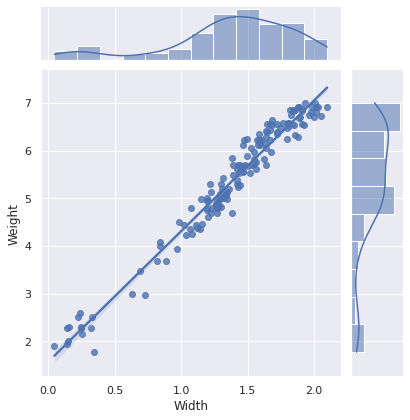

In [84]:
sns.jointplot(data=df_log, x='Width', y='Weight', kind='reg')

In [107]:
X = df_log.drop('Weight', axis=1)
y = df_log['Weight']

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)

lr.score(X, y)

0.9959289106154291

In [89]:
X = df_log.drop('Weight', axis=1)
y = df_log['Weight']

x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

/home/walisson/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3914.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):          2.37e-167
Time:                        12:10:02   Log-Likelihood:                 164.61
No. Observations:                 154   AIC:                            -309.2
Df Residuals:                     144   BIC:                            -278.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.9954      0.214     -9.324      0.000      -2.418      -1.572
Length1               1.5114      0.143     10.541      0.000       1.228       1.795
Height                0.7946      0.145      5.467      0.000       0.507       1.082
Width                 0.6303      0.110      5.719      0.000       0.412       0.848
Species_Parkki        0.0480      0.033      1.458      0.147      -0.017       0.113
Species_Perch         0.1148      0.076      1.515      0.132      -0.035       0.265
Species_Pike          0.0868      0.136      0.638      0.525      -0.182       0.356
Species_Roach         0.0773      0.067      1.158      0.249      -0.055       0.209
Species_Smelt        -0.0907      0.120     -0.756      0.451      -0.328       0.146
Species_Whitefish     0.1940      0.067      2.882      0.005       0.061       0.327
==============================================================================
Omnibus:                       23.109   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.634
Skew:                          -0.531   Prob(JB):                     5.59e-15
Kurtosis:                       6.017   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
X = df_log.drop(['Weight', 'Species_Pike'], axis=1)
y = df_log['Weight']

x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

/home/walisson/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     4421.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):          4.22e-169
Time:                        12:10:20   Log-Likelihood:                 164.39
No. Observations:                 154   AIC:                            -310.8
Df Residuals:                     145   BIC:                            -283.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.0479      0.197    -10.388      0.000      -2.438      -1.658
Length1               1.5887      0.076     20.779      0.000       1.438       1.740
Height                0.7082      0.053     13.461      0.000       0.604       0.812
Width                 0.6449      0.108      5.995      0.000       0.432       0.858
Species_Parkki        0.0464      0.033      1.417      0.159      -0.018       0.111
Species_Perch         0.0711      0.032      2.195      0.030       0.007       0.135
Species_Roach         0.0407      0.034      1.200      0.232      -0.026       0.108
Species_Smelt        -0.1614      0.046     -3.532      0.001      -0.252      -0.071
Species_Whitefish     0.1613      0.044      3.706      0.000       0.075       0.247
==============================================================================
Omnibus:                       24.804   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.968
Skew:                          -0.557   Prob(JB):                     5.26e-17
Kurtosis:                       6.231   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
X = df_log.drop(['Weight', 'Species_Pike', 'Species_Roach'], axis=1)
y = df_log['Weight']

x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

/home/walisson/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     5038.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):          1.17e-170
Time:                        12:16:57   Log-Likelihood:                 163.63
No. Observations:                 154   AIC:                            -311.3
Df Residuals:                     146   BIC:                            -287.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8796      0.139    -13.548      0.000      -2.154      -1.605
Length1               1.5333      0.061     25.118      0.000       1.413       1.654
Height                0.6697      0.042     16.039      0.000       0.587       0.752
Width                 0.7216      0.087      8.324      0.000       0.550       0.893
Species_Parkki        0.0353      0.031      1.121      0.264      -0.027       0.097
Species_Perch         0.0423      0.022      1.942      0.054      -0.001       0.085
Species_Smelt        -0.1869      0.041     -4.611      0.000      -0.267      -0.107
Species_Whitefish     0.1378      0.039      3.540      0.001       0.061       0.215
==============================================================================
Omnibus:                       27.552   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.566
Skew:                          -0.632   Prob(JB):                     4.33e-19
Kurtosis:                       6.403   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
df['Weight']

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [108]:
np.exp(y_pred)

array([ 263.89817612,  309.09969201,  322.31850972,  368.45077724,
        400.23213698,  425.76819994,  459.57218786,  407.81022946,
        450.67013379,  486.17991998,  493.45188207,  486.15002839,
        451.00843327,  510.4193324 ,  544.31218391,  585.70569174,
        577.59979556,  573.89656767,  605.14452907,  612.84906669,
        632.81918145,  649.52876374,  630.56580133,  700.8571243 ,
        690.51981336,  726.91895322,  736.71296938,  747.86597805,
        793.03389691,  933.92334355,  931.76731008,  932.36510078,
       1055.58389792, 1103.08217572, 1042.4559379 ,   36.35188436,
         73.52068085,   85.22029087,   96.19782652,  116.11320935,
        116.29931053,  116.01761743,  130.41909563,  140.97666438,
        154.73349359,  138.93696617,  149.4493413 ,  182.28330778,
        164.51124984,  189.43026206,  195.29428449,  261.82129354,
        281.14646948,  420.84384335,  264.34793282,  266.79623517,
        329.75858689,  563.38468697,  780.74521338,  942.03405

### Análise dos coeficientes da Regressão Linear

In [111]:
X = df_log.drop(['Weight', 'Species_Pike', 'Species_Roach'], axis=1)
y = df_log['Weight']

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)

lr.score(X, y)

0.9958768645411045

In [112]:
lr.intercept_

-1.879589374864313

In [113]:
lr.coef_

array([ 1.53325815,  0.66970986,  0.72160834,  0.03526868,  0.04230311,
       -0.18690816,  0.13777847])

In [116]:
X.columns

Index(['Length1', 'Height', 'Width', 'Species_Parkki', 'Species_Perch',
       'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

#### Regressão Linear Múltipla

$$
    y_i = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 + \dots + \beta_n x_n
$$

In [118]:
pd.DataFrame(lr.coef_, index=X.columns, columns=['Coef'])

,Coef
Length1,1.533258
Height,0.669710
Width,0.721608
Species_Parkki,0.035269
Species_Perch,0.042303
Species_Smelt,-0.186908
Species_Whitefish,0.137778


### Divisão Treino/Teste

1. Divide os dados de entrada e saída em treino e teste.
2. Fit do modelo com os dados de treino.
3. Realizar um predict dos dados de test e verificar o acerto com relação à saída verdadeira (`y_test`).

In [119]:
from sklearn.model_selection import train_test_split

In [123]:
X.shape

(154, 7)

O `trains_test_split` retorna uma lista com os seguintes elementos:

1. `X_train`: os dados de entrada para treino.
2. `X_test`: os dados de entrada para teste.
3. `y_train`: os dados de saída para treino.
4. `y_test`: os dados de saída para teste.

In [125]:
a, b = [10, 20]

In [126]:
a

10

In [127]:
b

20

In [133]:
X.head()

,Length1,Height,Width,Species_Parkki,Species_Perch,Species_Smelt,Species_Whitefish
0,3.144152,2.444085,1.391282,0,0,0,0
1,3.178054,2.524127,1.459917,0,0,0,0
2,3.173878,2.515905,1.546732,0,0,0,0
3,3.269569,2.543961,1.494139,0,0,0,0
4,3.277145,2.521239,1.635885,0,0,0,0


In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [129]:
X_train

,Length1,Height,Width,Species_Parkki,Species_Perch,Species_Smelt,Species_Whitefish
59,3.517498,2.464806,1.883062,0,0,0,1
106,3.254243,2.056736,1.436084,0,1,0,0
82,2.944439,1.739150,1.268355,0,1,0,0
137,3.737670,1.940179,1.588419,0,0,0,0
3,3.269569,2.543961,1.494139,0,0,0,0
...,...,...,...,...,...,...,...
151,2.424803,0.794756,0.249824,0,0,1,0
36,2.803360,1.667386,1.037340,0,0,0,0
20,3.443618,2.716580,1.717305,0,0,0,0
84,2.944439,1.739150,1.299510,0,1,0,0


In [131]:
X_test.shape

(47, 7)

In [132]:
y_train

59     6.684612
106    5.521461
82     4.700480
137    6.214608
3      5.894403
         ...   
151    2.302585
36     4.234107
20     6.354370
84     4.828314
152    2.292535
Name: Weight, Length: 107, dtype: float64

### Procedimento dividindo os dados

In [134]:
# Separando variáveis de entrada e a variável de saída
X = df_log.drop(['Weight', 'Species_Pike', 'Species_Roach'], axis=1)
y = df_log['Weight']

# Dividindo os dados para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# Treinar o modelo de regressão
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [139]:
lr.score(X_train, y_train)

0.9956636874550814

In [135]:
y_pred = lr.predict(X_test)

In [143]:
from sklearn.metrics import r2_score, mean_squared_error

In [142]:
r2_score(y_test, y_pred)

0.9958132076190791

In [140]:
lr.score(X_test, y_test)

0.9958132076190791